In [1]:
import math
import requests
from bs4 import BeautifulSoup
import pandas as pd # load the table into a DataFrame
from sklearn import linear_model # fit the linear regression model and calculate its error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt # visualize the model
from scipy.stats import pearsonr # test the correlation

In [2]:
url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'
page = requests.get(url)
height_weight_df = pd.read_html(url)[1][['Height(Inches)', 'Weight(Pounds)']]

In [3]:
num_records = 200 # we only want 200 measures
x = height_weight_df['Height(Inches)'].values.reshape(num_records, 1)
y = height_weight_df['Weight(Pounds)'].values.reshape(num_records,1)

In [4]:
model = linear_model.LinearRegression().fit(x,y)
print("ŷ =" + str(model.intercept_[0]) + " + " + str(model.coef_.T[0][0]) + " X1") # model formula (how does the model works)

ŷ =-106.02770644878137 + 3.4326761292716297 X1


In [5]:
y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
print(mae)

7.7587373803882205


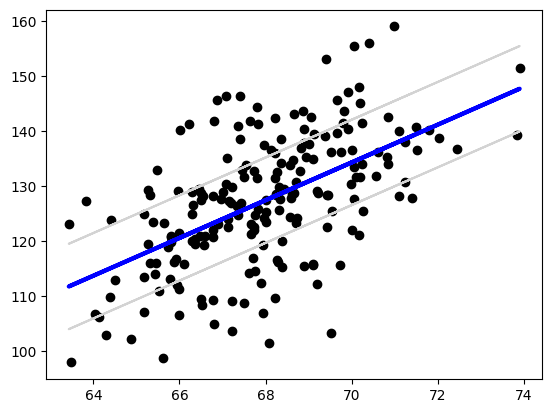

In [6]:
# visualize de model and the mean absolute error
plt.scatter(x, y, color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.plot(x, y_pred + mae, color='lightgray')
plt.plot(x, y_pred - mae, color='lightgray')
# we have a mae of more or less 8 but our error is +- 23 pounds!! thats why it is important to visualize our data and results, and errors

In [7]:
corr, pval = pearsonr(x[:,0], y[:,0]) # Pearson's correlation coefficient-> stadistical measures association between two or more variables using their covariance divided by their standard deviation.
print(corr)                           # Result -> [-1,1]. closer to 0 = weaker association; closer to 1 = positive association; closer to -1 = negative association
# results was possitive. Normal because as height increase, weight do the same. Also is closser to 1 than to 0 denoting strong correlation
print(pval < 0.05) # pval test non-correlation. It is less than our threshold of 5% so there is sufficient evidence of this correlation

0.5568647346122995
True
